# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Dataset/xclara.csv')
print('Shape of dataset: {}'.format(data.shape))

Shape of dataset: (3000, 2)


In [3]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


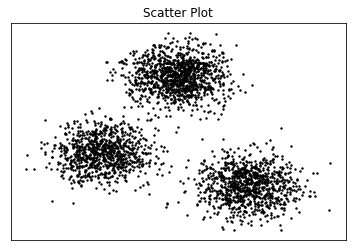

In [4]:
plt.scatter(data['V1'], data['V2'], color='black', s=2)
plt.xticks([], [])
plt.yticks([], [])
plt.title('Scatter Plot')
plt.show()

In [5]:
def dist(X1, X2):
    """ Calculates the Euclidian(L2) distance between X1 and X2 """
    return np.sqrt(np.sum((X1 - X2)**2, axis=1))

In [6]:
K = 3 # Numbers of cluster

In [7]:
# Rnadomly initializing centroids for all the 3 clusters
C_x = np.random.randint(0, np.max(data['V1']), K)
C_y = np.random.randint(0, np.max(data['V2']), K)

for i in range(K):
    print('Randomly initialized centroid for cluster {}: [{},{}]'.format(i, C_x[i], C_y[i]))

Randomly initialized centroid for cluster 0: [69,9]
Randomly initialized centroid for cluster 1: [95,28]
Randomly initialized centroid for cluster 2: [7,63]


In [8]:
X = np.asarray(list(zip(data['V1'], data['V2'])), dtype=np.float32)
C = np.asarray(list(zip(C_x, C_y)), dtype=np.float32)

C_old = np.zeros(C.shape) # For holding the old clusters during optimization
clusters = np.zeros(X.shape[0]) # Initial allocation of clusters to data points

In [9]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]], dtype=float32)

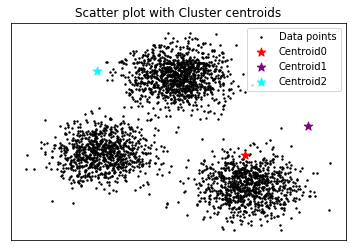

In [10]:
color = ['red', 'purple', 'cyan','green', 'magenta']
plt.scatter(X[:, 0], X[:, 1], color='black', s=2)
legend = ['Data points']
for i in range(K):
    plt.scatter(C[i][0], C[i][1], marker='*', color=color[i], s=80)
    legend.append('Centroid'+str(i))
plt.xticks([], [])
plt.yticks([], [])
plt.title('Scatter plot with Cluster centroids')
plt.legend(legend)
plt.show()

In [11]:
def optimizer(num_epochs):
    
    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            
            """ Cluster assingment """
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        for i in range(K):
            """ Moving centroid """
            points = [X[j] for j in range(X.shape[0]) if clusters[j]==i]
            C[i] = np.mean(points, axis=0)
            
        if ((epoch+1)%2==0):
            color = ['red', 'purple', 'cyan','green', 'magenta']
            plt.scatter(X[:, 0], X[:, 1], color='black', s=2)
            legend = ['Data points']
            for i in range(K):
                plt.scatter(C[i][0], C[i][1], marker='*', color=color[i], s=80)
                legend.append('Centroid'+str(i))
            plt.xticks([], [])
            plt.yticks([], [])
            plt.title('Scatter plot with Cluster centroids')
            plt.legend(legend)
            plt.xlabel('Epoch: '+str(epoch+1))
            plt.show()


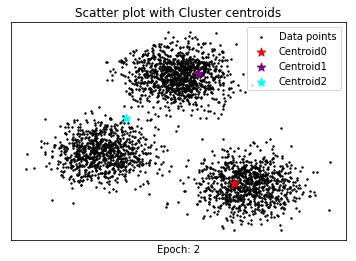

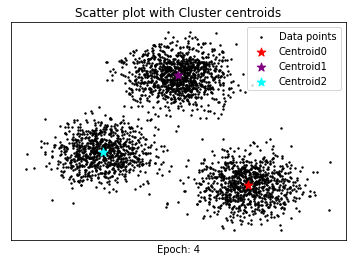

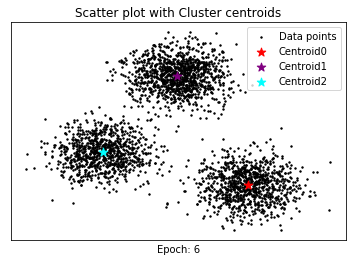

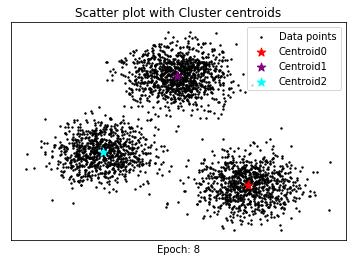

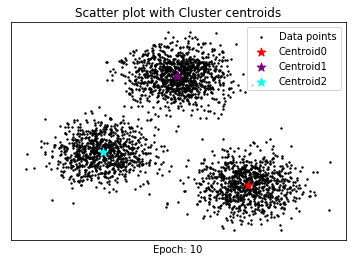

In [12]:
optimizer(10)

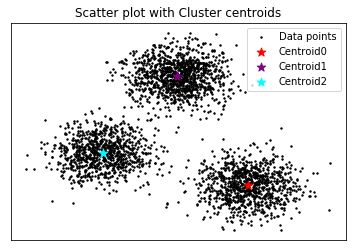

In [13]:
color = ['red', 'purple', 'cyan','green', 'magenta']
plt.scatter(X[:, 0], X[:, 1], color='black', s=2)
legend = ['Data points']
for i in range(K):
    plt.scatter(C[i][0], C[i][1], marker='*', color=color[i], s=80)
    legend.append('Centroid'+str(i))
plt.xticks([], [])
plt.yticks([], [])
plt.title('Scatter plot with Cluster centroids')
plt.legend(legend)
plt.show()